# UAS Pengolahan Citra

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('y1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

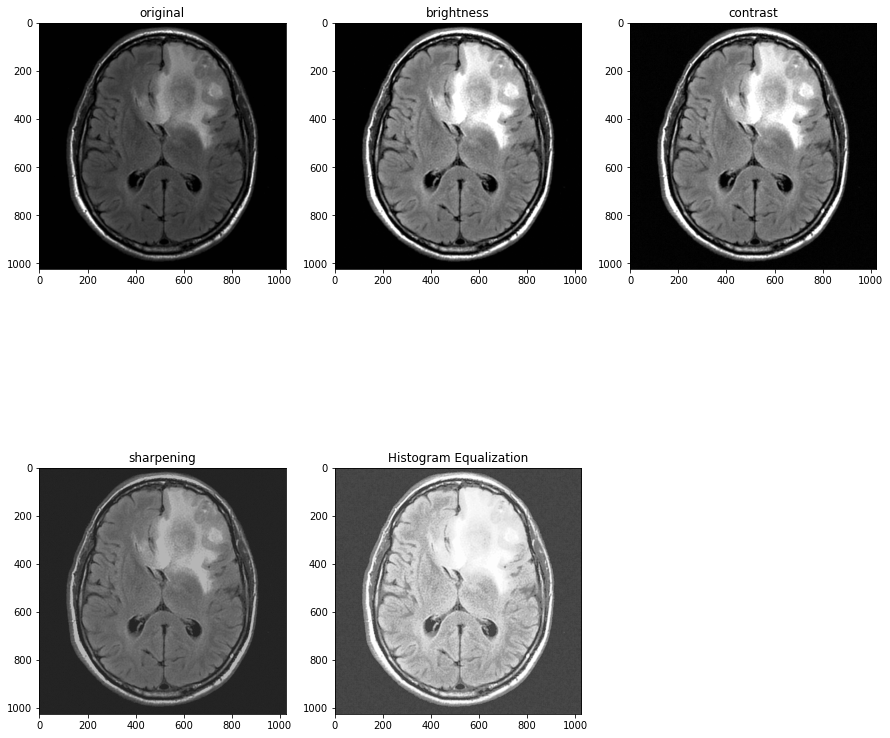

In [60]:
from PIL import Image, ImageEnhance, ImageFilter

brightfgs = plt.figure(figsize=(15,15))
pilow = Image.open('y1.jpg')
pilow = pilow.convert('L')

# Brighness
enhancer = ImageEnhance.Brightness(pilow)
bright = enhancer.enhance(1.8)

# Contrast
enhancer = ImageEnhance.Contrast(bright)
contrast = enhancer.enhance(0.1)

# Sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharp = cv2.filter2D(np.array(contrast), -1, kernel)

# Histogram Equalization
equ = cv2.equalizeHist(sharp)

brightfgs.add_subplot(2,3,1)
plt.title('original')
plt.imshow(img, cmap='gray')

brightfgs.add_subplot(2,3,2)
plt.title('brightness')
plt.imshow(bright, cmap='gray')

brightfgs.add_subplot(2,3,3)
plt.title('contrast')
plt.imshow(contrast, cmap='gray')

brightfgs.add_subplot(2,3,4)
plt.title('sharpening')
plt.imshow(sharp, cmap='gray')

brightfgs.add_subplot(2,3,5)
plt.title('Histogram Equalization')
plt.imshow(equ, cmap='gray')

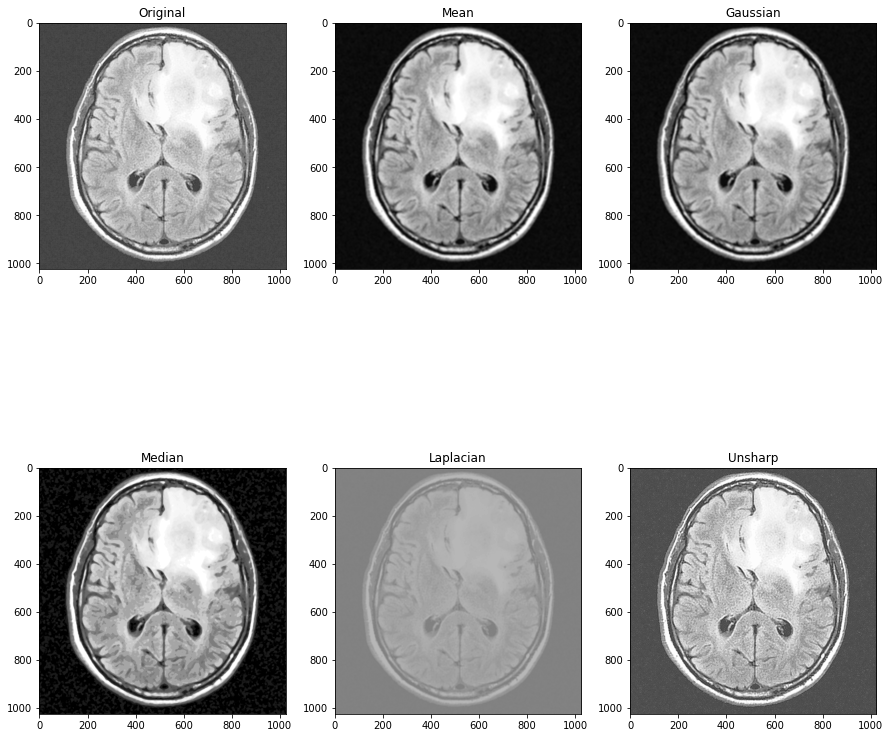

In [61]:
# filter
medfgs = plt.figure(figsize=(15,15))
filter_size = 9

# Mean
mean = cv2.blur(equ, (filter_size, filter_size))

# Gaussian
gaussian = cv2.GaussianBlur(equ, (filter_size, filter_size), 9)

# Median
median = cv2.medianBlur(equ,9)

# Laplacian
mask = cv2.Laplacian(equ, cv2.CV_64F)
laplacian = equ + mask

# Unsharp
mask = Image.fromarray(equ.astype('uint8'))
unsharp = mask.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

medfgs.add_subplot(2,3,1)
plt.title('Original')
plt.imshow(equ, cmap='gray')

medfgs.add_subplot(2,3,2)
plt.title('Mean')
plt.imshow(mean, cmap='gray')

medfgs.add_subplot(2,3,3)
plt.title('Gaussian')
plt.imshow(gaussian, cmap='gray')

medfgs.add_subplot(2,3,4)
plt.title('Median')
plt.imshow(median, cmap='gray')

medfgs.add_subplot(2,3,5)
plt.title('Laplacian')
plt.imshow(laplacian, cmap='gray')

medfgs.add_subplot(2,3,6)
plt.title('Unsharp')
plt.imshow(unsharp, cmap='gray')

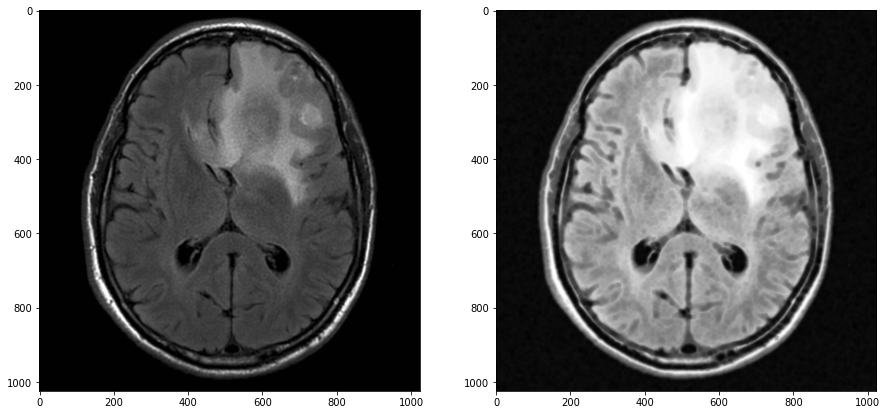

In [62]:
filter2 = plt.figure(figsize=(15,15))

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(gaussian, kernel, iterations=1)

filter2.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

filter2.add_subplot(1,2,2)
plt.imshow(erosion, cmap='gray')

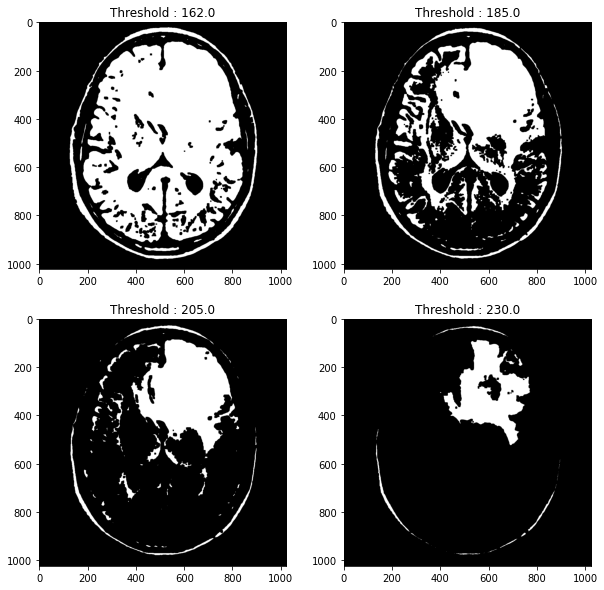

In [65]:
threshfig = plt.figure(figsize=(10,10))

# Thresholding
ret1, thresh1 = cv2.threshold(erosion, 162, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(erosion, 185, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(erosion, 205, 255, cv2.THRESH_BINARY)
ret4, thresh4 = cv2.threshold(erosion, 230, 255, cv2.THRESH_BINARY)

threshfig.add_subplot(2,2,1)
plt.title('Threshold : ' +str(ret1))
plt.imshow(thresh1, cmap='gray')

threshfig.add_subplot(2,2,2)
plt.title('Threshold : '+str(ret2))
plt.imshow(thresh2, cmap='gray')

threshfig.add_subplot(2,2,3)
plt.title('Threshold : '+str(ret3))
plt.imshow(thresh3, cmap='gray')

threshfig.add_subplot(2,2,4)
plt.title('Threshold : '+str(ret4))
plt.imshow(thresh4, cmap='gray')

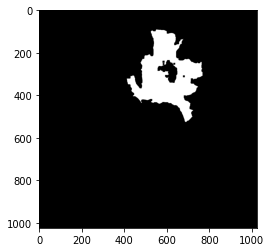

In [66]:
ret, markers = cv2.connectedComponents(thresh4)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_mask = np.uint8(brain_mask)
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')